#### Обработка данных

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pymc3 import  *

%matplotlib inline

In [3]:
from scipy import optimize as opt 
import scipy
import scipy.odr as odr

In [4]:
import plotly.plotly as py
import plotly.graph_objs as go

In [14]:
data1 = pd.read_csv('data/experiment1.csv')
data2 = pd.read_csv('data/experiment2.csv')
data3 = pd.read_csv('data/experiment3.csv')

1)

In [27]:
data2

,T,N,x,N0
0,99.860,1418,0.0,1419.987983
1,99.860,1437,1.0,1439.014620
2,100.101,1548,2.0,1546.438098
3,99.677,1534,3.0,1538.970876
4,100.277,1560,4.0,1555.690737
5,102.406,1670,5.0,1630.763822
6,99.821,1412,6.0,1414.532012
7,91.961,964,7.0,1048.270462
8,100.145,245,8.0,244.645264
9,102.857,52,9.0,50.555626


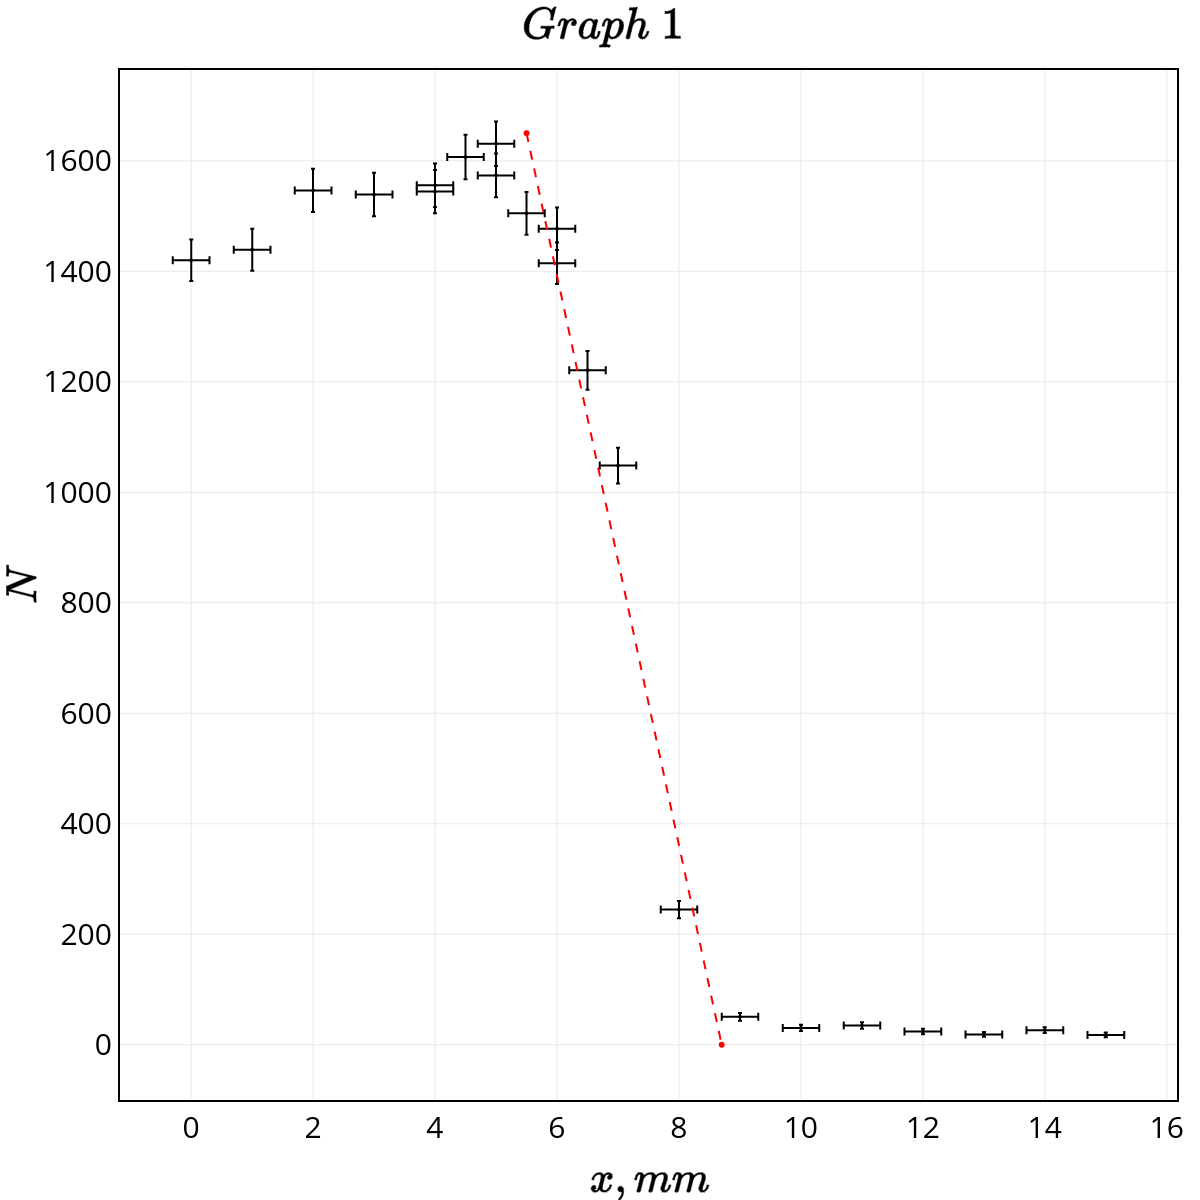

In [80]:
trace1 = go.Scatter(
    x = data2['x'],
    y = data2['N0'],
    mode = 'markers',
    error_y = dict(
        type = 'data',
        array = np.sqrt(data2['N0']),
        visible = True,
        color = '#000000',
        thickness = 2,
        width = 2
    ),
    error_x = dict(
        type = 'constant',
        value = 0.3,
        visible = True,
        color = '#000000'
    ),
    marker = dict(
        size = 4,
        opacity = 1,
        color = '#000000'
    )
)

trace2 = go.Scatter(
    x = [5.5, 8.7],
    y = [1650.0, 0.0],
    line = dict(
        color = ('#ff0000'),
        width = 2,
        dash = 'dash'),
    showlegend = False
)

trace0 = [trace1, trace2]

layout = go.Layout(
    title = "$Graph~1$",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    showlegend=False,
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$x, mm$',
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$N$',
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 120,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    )
    
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(figure, filename='basic-error-bar')
py.image.save_as(fig, 'my_plot1.png')
#! open my_plot.png
from IPython.display import Image
Image("my_plot1.png", width=500)

2)

In [81]:
data3['N0'] = (data3['N1'] + data3['N2'] + data3['N3']) / 3.0
data3['disp_N'] = 0.5 * np.sqrt(np.square(data3['N1'] - data3['N0']) + 
                                np.square(data3['N2'] - data3['N0']) + 
                                np.square(data3['N3'] - data3['N0']))

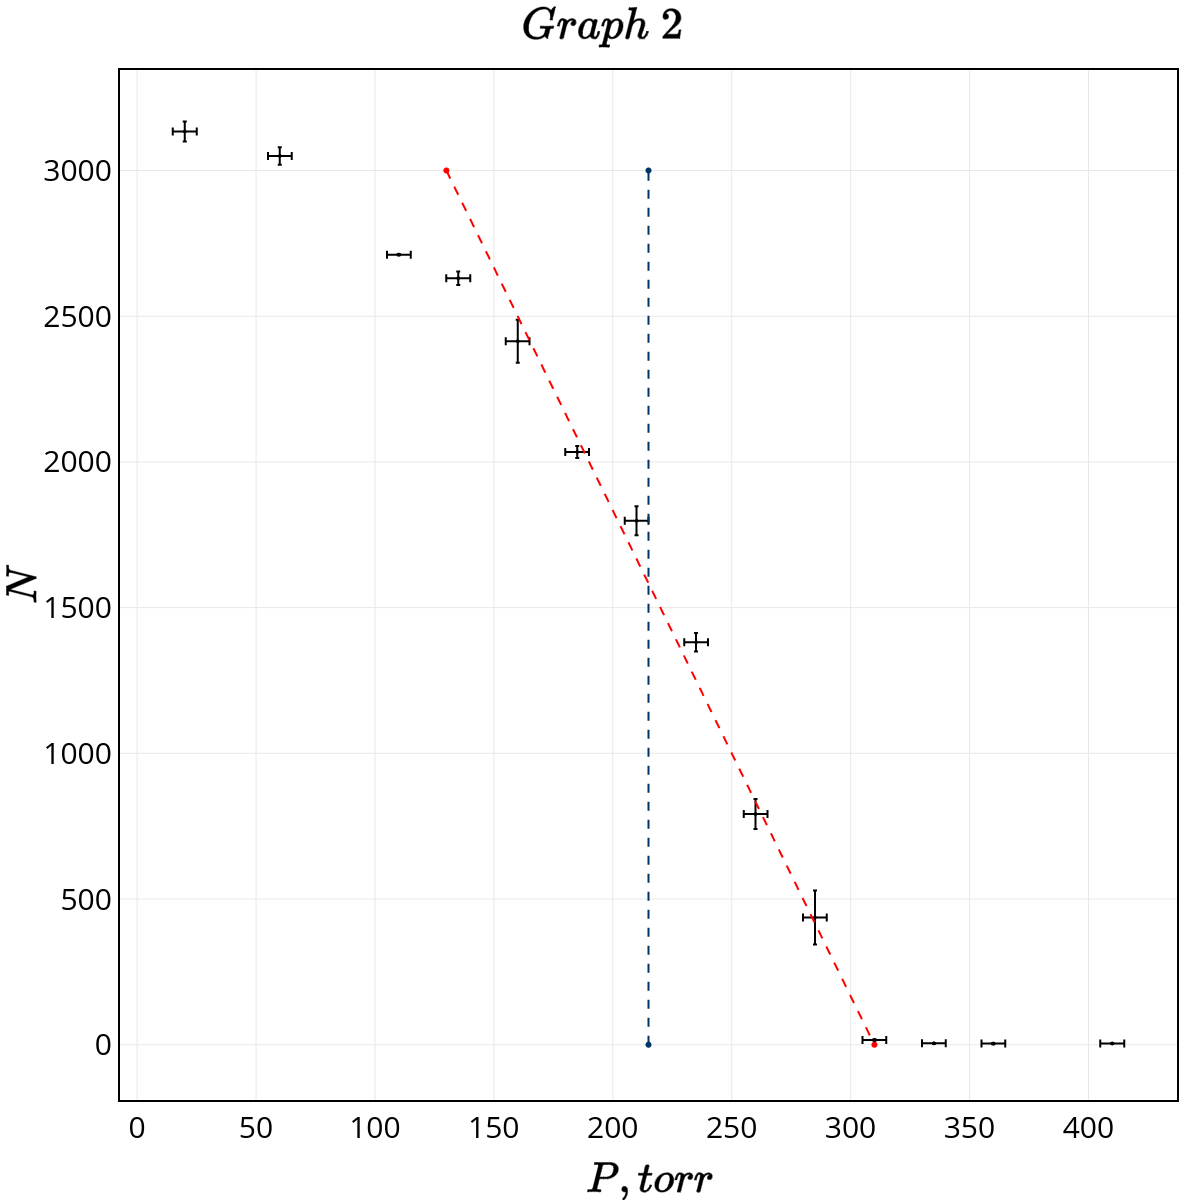

In [82]:
trace1 = go.Scatter(
    x = np.abs(data3['P'] - 760),
    y = data3['N0'],
    mode = 'markers',
    error_y = dict(
        type = 'data',
        array = data3['disp_N'],
        visible = True,
        color = '#000000',
        thickness = 2,
        width = 2
    ),
    error_x = dict(
        type = 'constant',
        value = 5,
        visible = True,
        color = '#000000'
    ),
    marker = dict(
        size = 4,
        opacity = 1,
        color = '#000000'
    )
)

trace2 = go.Scatter(
    x = [130, 310],
    y = [3000, 0],
    line = dict(
        color = ('#ff0000'),
        width = 2,
        dash = 'dash'),
    showlegend = False
)

trace3 = go.Scatter(
    x = [215, 215],
    y = [0, 3000],
    line = dict(
        color = ('#003366'),
        width = 2,
        dash = 'dash'),
    showlegend = False
)

trace0 = [trace1, trace2, trace3]

layout = go.Layout(
    title = "$Graph~2$",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    showlegend=False,
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$P, torr$',
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$N$',
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 120,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    )
    
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(figure, filename='basic-error-bar')
py.image.save_as(fig, 'my_plot2.png')
#! open my_plot.png
from IPython.display import Image
Image("my_plot2.png", width=500)

3)

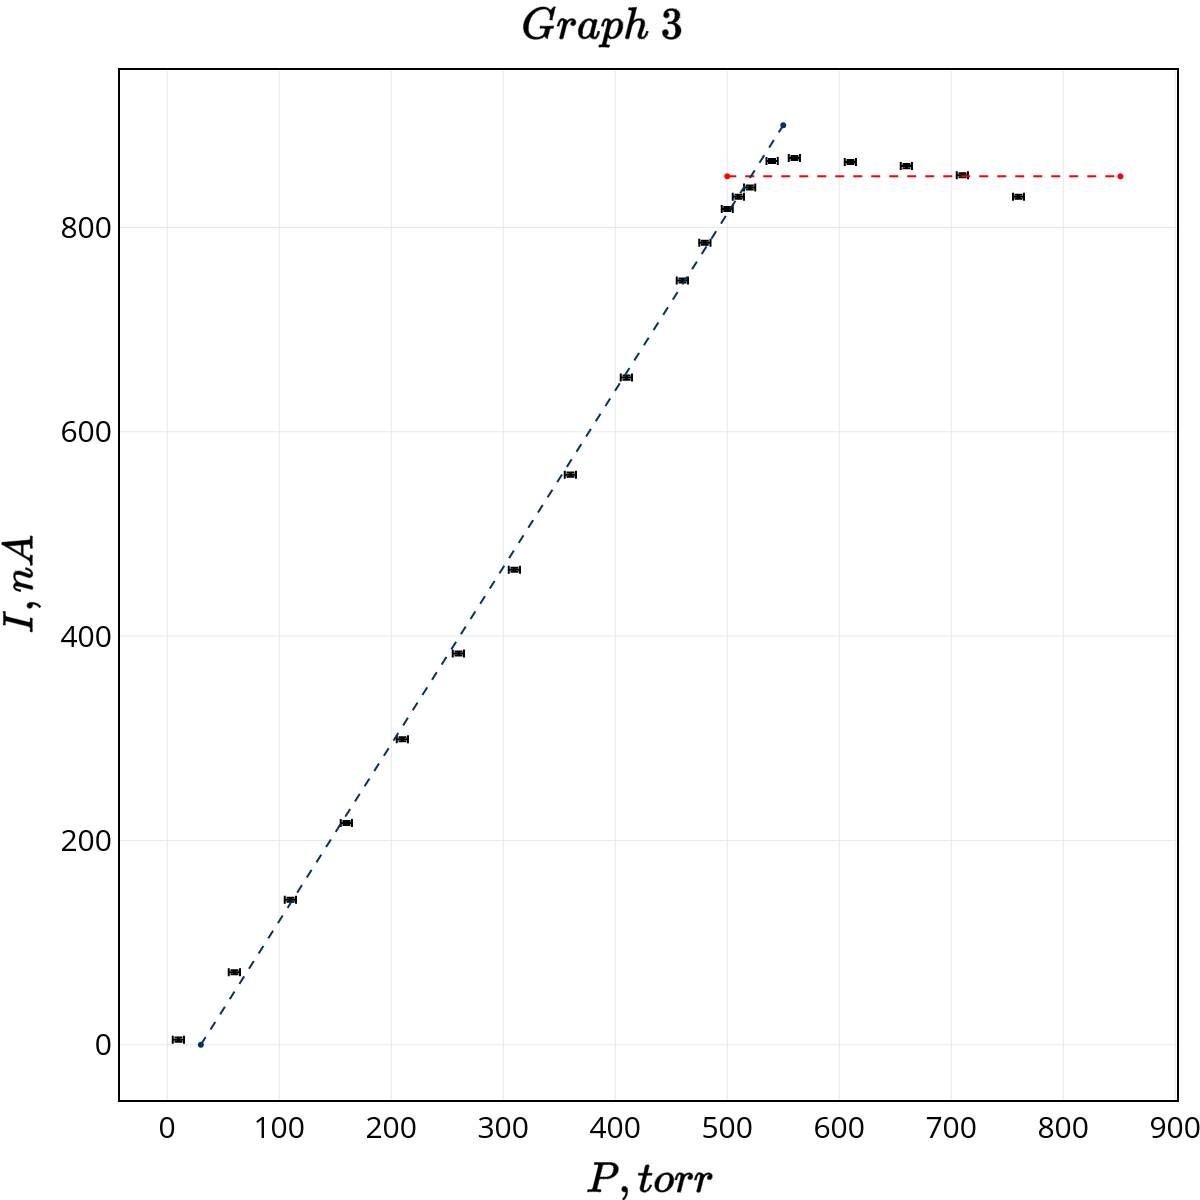

In [83]:
trace1 = go.Scatter(
    x = np.abs(data1['P'] - 760),
    y = data1['I'],
    mode = 'markers',
    error_y = dict(
        type = 'constant',
        value = 2,
        visible = True,
        color = '#000000'
    ),
    error_x = dict(
        type = 'constant',
        value = 5,
        visible = True,
        color = '#000000'
    ),
    marker = dict(
        size = 4,
        opacity = 1,
        color = '#000000'
    )
)

trace2 = go.Scatter(
    x = [500, 851],
    y = [850, 850],
    line = dict(
        color = ('#ff0000'),
        width = 2,
        dash = 'dash'),
    showlegend = False
)

trace3 = go.Scatter(
    x = [30, 550],
    y = [0, 900],
    line = dict(
        color = ('#003366'),
        width = 2,
        dash = 'dash'),
    showlegend = False
)

trace0 = [trace1, trace2, trace3]

layout = go.Layout(
    title = "$Graph~3$",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    showlegend=False,
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$P, torr$',
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$I, nA$',
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 120,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    )
    
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(figure, filename='basic-error-bar')
py.image.save_as(fig, 'my_plot3.png')
#! open my_plot.png
from IPython.display import Image
Image("my_plot3.png", width=500)